In [ ]:
# data <- read.csv("../data/observations.csv", header = TRUE, sep = ",")
# print(dim(data))  # Print the dimensions of the data frame

# # Check for missing values in the dataset per column and get a the missing values per column
# missing_values <- colSums(is.na(data))
# cat("Total missing values in the dataset per column:\n")
# print(missing_values[missing_values > 0])

# # Function to drop columns with more than a specified threshold of missing values
# drop_columns_with_missing <- function(data, missing_values, threshold_ratio = 0.3) {
#     threshold <- threshold_ratio * nrow(data)
#     cols_to_drop <- names(missing_values[missing_values > threshold])
#     data_cleaned <- data[, !(names(data) %in% cols_to_drop)]
#     cat("Dropped columns with more than", threshold_ratio * 100, "% missing values:\n")
#     print(cols_to_drop)
#     # Save the cleaned data to a new CSV file
#     write.csv(data_cleaned, "observations_cleaned.csv", row.names = FALSE)
#     return(data_cleaned)
# }

[1] 1719567      66
Total missing values in the dataset per column:
                                   Pression.au.niveau.mer 
                                                    94370 
                        Variation.de.pression.en.3.heures 
                                                    40694 
                            Type.de.tendance.barométrique 
                                                    68236 
                            Direction.du.vent.moyen.10.mn 
                                                    14843 
                              Vitesse.du.vent.moyen.10.mn 
                                                    14524 
                                              Température 
                                                    22176 
                                           Point.de.rosée 
                                                    32830 
                                                 Humidité 
                                               

In [1]:
data_cleaned <- read.csv("../data/observations_cleaned.csv", header = TRUE, sep = ",")


In [2]:
summary(data_cleaned)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

In [6]:
# par(bg = 'lightgrey')
# help(data_cleaned)
ncol(data_cleaned)

[1] 27

In [10]:
# Exemple : table observations
# df <- observations
# par(bg='white')
# # Sélectionner uniquement les colonnes numériques
# numeric_cols <- names(data_cleaned)[sapply(data_cleaned, is.numeric)]

# # Boucle sur les colonnes numériques
# for (col in numeric_cols) {
  
#   # Définir la fenêtre avec 1 ligne, 2 colonnes
#   par(mfrow = c(1, 2))  
  
#   # Boxplot
#   boxplot(data_cleaned[[col]],
#           main = paste( col),
#           col = "skyblue")
  
#   # Histogramme
#   hist(data_cleaned[[col]],
#        main = paste( col),
#        xlab = col,
#        col = "orange",
#        border = "black")
  
#   # Remettre en affichage normal (1 seul graphe par défaut)
#   par(mfrow = c(1, 1))
# }





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                                    Pression.au.niveau.mer
Pression.au.niveau.mer                          1.00000000
Variation.de.pression.en.3.heures               0.07840493
Type.de.tendance.barométrique                  -0.05477081
Direction.du.vent.moyen.10.mn                  -0.05573061
Vitesse.du.vent.moyen.10.mn                    -0.24433342
Température                                    -0.17716027
Point.de.rosée                                 -0.21165421
Humidité                                       -0.01482163
Visibilité.horizontale                         -0.06879150
Temps.présent                                  -0.15483128
Pression.station                                0.37390829
Variation.de.pression.en.24.heures              0.34034416
Rafale.sur.les.10.dernières.minutes            -0.25797020
Rafales.sur.une.période                        -0.27941187
                                    Variation.de.pression.en.3.heures
Pression.au.niveau.mer                       

corrplot 0.95 loaded



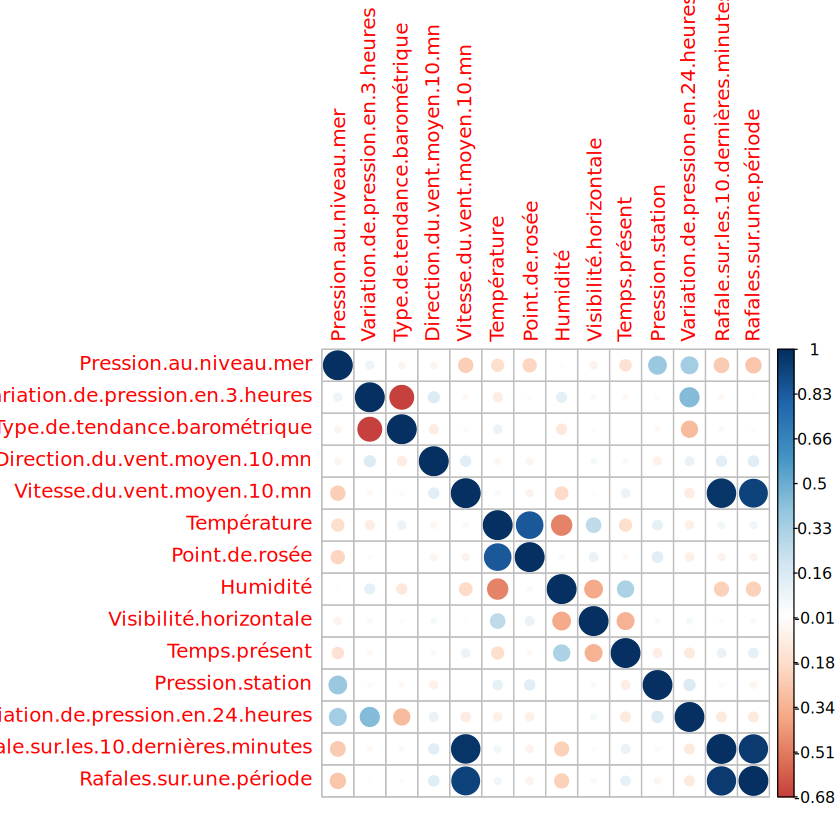

In [3]:
library(dplyr)
par(bg="white") # nolint
# Sélection des colonnes qui t'intéressent
# Sélection des colonnes 2 à 7
# Sélection des colonnes 2 à 7
vars <- data_cleaned[, 2:16]

# Garder uniquement les colonnes numériques
vars_num <- vars[, sapply(vars, is.numeric)]

# Matrice de covariance
cov_mat <- cor(vars_num, use = "complete.obs")

print(cov_mat)

library(corrplot)
corrplot(cov_mat, method = "circle", is.corr = FALSE)


In [1]:
par(bg="white")
lm(vars_num$Humidité~.,data=vars_num)


ERROR: Error in eval(mf, parent.frame()): object 'vars_num' not found


In [6]:
step(lm(vars_num$Humidité~.,data=vars_num))

Start:  AIC=2829470
vars_num$Humidité ~ Pression.au.niveau.mer + Variation.de.pression.en.3.heures + 
    Type.de.tendance.barométrique + Direction.du.vent.moyen.10.mn + 
    Vitesse.du.vent.moyen.10.mn + Température + Point.de.rosée + 
    Visibilité.horizontale + Temps.présent + Pression.station + 
    Variation.de.pression.en.24.heures + Rafale.sur.les.10.dernières.minutes + 
    Rafales.sur.une.période

                                      Df Sum of Sq       RSS     AIC
<none>                                              12921898 2829470
- Variation.de.pression.en.24.heures   1        36  12921934 2829471
- Vitesse.du.vent.moyen.10.mn          1       114  12922012 2829478
- Pression.station                     1      1874  12923772 2829640
- Direction.du.vent.moyen.10.mn        1      2395  12924293 2829687
- Rafale.sur.les.10.dernières.minutes  1      3253  12925151 2829766
- Variation.de.pression.en.3.heures    1      8424  12930322 2830239
- Type.de.tendance.barométrique      


Call:
lm(formula = vars_num$Humidité ~ Pression.au.niveau.mer + Variation.de.pression.en.3.heures + 
    Type.de.tendance.barométrique + Direction.du.vent.moyen.10.mn + 
    Vitesse.du.vent.moyen.10.mn + Température + Point.de.rosée + 
    Visibilité.horizontale + Temps.présent + Pression.station + 
    Variation.de.pression.en.24.heures + Rafale.sur.les.10.dernières.minutes + 
    Rafales.sur.une.période, data = vars_num)

Coefficients:
                        (Intercept)               Pression.au.niveau.mer  
                          9.363e+01                           -2.254e-04  
  Variation.de.pression.en.3.heures        Type.de.tendance.barométrique  
                         -1.014e-03                            4.621e-02  
      Direction.du.vent.moyen.10.mn          Vitesse.du.vent.moyen.10.mn  
                          4.404e-04                           -1.644e-02  
                        Température                       Point.de.rosée  
                         -3.836e

In [ ]:
library(dplyr)
library(ggplot2)

plot_monthly_avg <- function(data, station_id, variable) {
  # Vérification que la colonne Date est bien en format datetime
  if (!inherits(data$Date, "POSIXct") && !inherits(data$Date, "Date")) {
    data$Date <- as.POSIXct(data$Date, tz = "UTC")
  }
  
  # Filtrer par station
  station_data <- data %>% 
    filter(ID.OMM.station == station_id)
  
  if (nrow(station_data) == 0) {
    message(paste("Aucune donnée trouvée pour la station", station_id))
    return(NULL)
  }
  
  # Vérifier si la variable existe
  if (!(variable %in% names(station_data))) {
    message(paste("La variable", variable, "n'existe pas dans le dataset."))
    return(NULL)
  }
  
  # Calcul des moyennes mensuelles (sans lubridate)
  monthly_avg <- station_data %>%
    mutate(Mois = as.integer(format(Date, "%m"))) %>%
    group_by(Mois) %>%
    summarise(valeur = mean(.data[[variable]], na.rm = TRUE))
  
  # Plot avec ggplot2
  ggplot(monthly_avg, aes(x = Mois, y = valeur)) +
    geom_line(color = "steelblue") +
    geom_point(size = 2, color = "darkred") +
    scale_x_continuous(breaks = 1:12) +
    labs(title = paste("Moyenne mensuelle de", variable, "- Station", station_id),
         x = "Mois",
         y = variable) +
    theme_minimal()
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




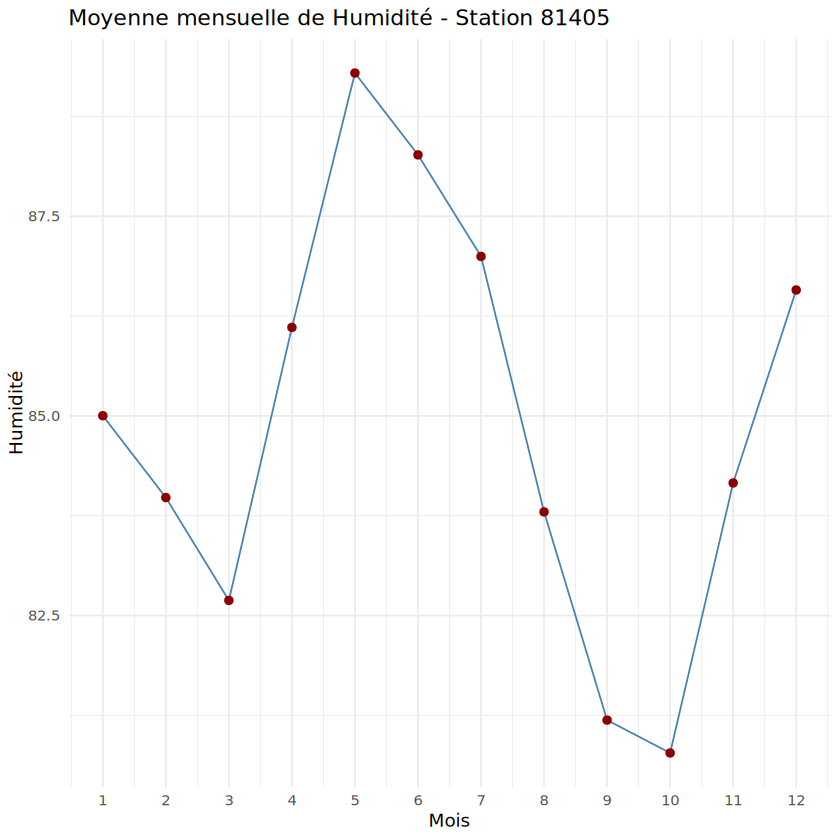

In [33]:
plot_monthly_avg(data_cleaned, station_id = 81405, variable = "Humidité")

In [13]:
# Valeurs uniques
unique(data_cleaned$ID.OMM.station)

# En tant que "set" (sans doublons, mais trié)
sort(unique(data_cleaned$ID.OMM.station))

# Si tu veux aussi savoir combien il y en a
length(unique(data_cleaned$ID.OMM.station))


[1] 78925 61998  7690  7149  7139  7790  7072 61997  7434  7015  7117  7255
[13] 81415  7591  7643  7535  7020  7110 61980  7460  7630 61996  7621  7650
[25]  7280 71805  7335 61976  7037  7027  7481  7207 81405  7661  7747  7168
[37]  7314  7240  7471 61972 78897  7190  7627  7299 81401  7607  7130  7510
[49] 78890  7577  7222 78922 81408  7558  7181 61968  7005  7761 67005 89642
[61] 78894 61970

[1]  7005  7015  7020  7027  7037  7072  7110  7117  7130  7139  7149  7168
[13]  7181  7190  7207  7222  7240  7255  7280  7299  7314  7335  7434  7460
[25]  7471  7481  7510  7535  7558  7577  7591  7607  7621  7627  7630  7643
[37]  7650  7661  7690  7747  7761  7790 61968 61970 61972 61976 61980 61996
[49] 61997 61998 67005 71805 78890 78894 78897 78922 78925 81401 81405 81408
[61] 81415 89642

[1] 62

In [28]:
plot_station_daily_avg_by_month <- function(data, mois, stations, variable) {
  # Vérification que la colonne Date est bien en format datetime
  if (!inherits(data$Date, "POSIXct") && !inherits(data$Date, "Date")) {
    data$Date <- as.POSIXct(data$Date, tz = "UTC")
  }
  
  # Vérifier si la variable existe
  if (!(variable %in% names(data))) {
    message(paste("La variable", variable, "n'existe pas dans le dataset."))
    return(NULL)
  }
  
  # Filtrer sur le mois et les stations choisies
  subset_data <- data %>%
    filter(as.integer(format(Date, "%m")) == mois,
           ID.OMM.station %in% stations)
  
  if (nrow(subset_data) == 0) {
    message("Aucune donnée trouvée pour ce mois et ces stations.")
    return(NULL)
  }
  
  # Calcul de la moyenne journalière par station
  daily_avg <- subset_data %>%
    mutate(Jour = as.integer(format(Date, "%d"))) %>%
    group_by(ID.OMM.station, Jour) %>%
    summarise(valeur = mean(.data[[variable]], na.rm = TRUE), .groups = "drop")
  
  # Plot : une courbe par station
  ggplot(daily_avg, aes(x = Jour, y = valeur, color = factor(ID.OMM.station))) +
  geom_line() +
  geom_point() +
  labs(title = paste("Moyenne journalière de", variable, "en mois", mois),
       x = "Jour du mois",
       y = variable,
       color = "Station") +
  scale_x_continuous(breaks = 1:31) +
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black")
  )


}


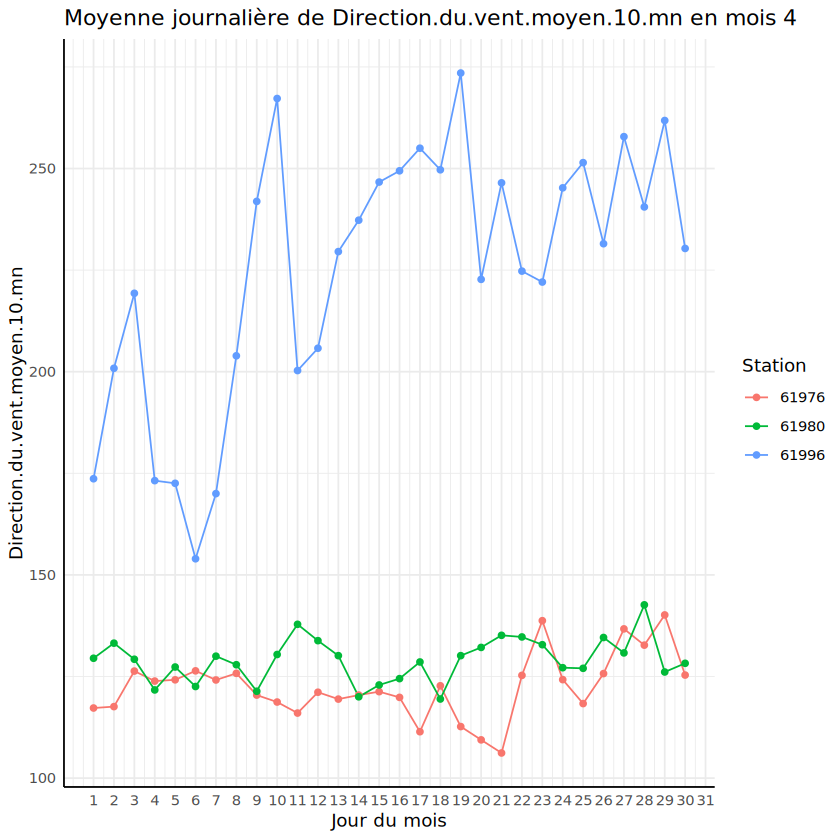

In [32]:

stations_a_comparer <- c(61976,61980,61996)
# Plot de la température moyenne en avril (mois = 4)
plot_station_daily_avg_by_month(data_cleaned, mois = 4, stations = stations_a_comparer, variable = "Direction.du.vent.moyen.10.mn")